In [3]:
import numpy as np
import gspread
from df2gspread import df2gspread as d2g
from oauth2client.service_account import ServiceAccountCredentials
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
### This part just makes it easier to do live updates from the sheet
### This fetches data from the google sheet and writes to the 'EnergyDistributionData.csv'
### However I do not want to put my service key on github, so if you want to run this just ask for the service key
### NOTE for tutors - this section is not necessary, this git repo will contain the data - just run the next cell
scope = [
   'https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']
#Name of our Service Account Key
google_key_file = 'service_key.json'
credentials = ServiceAccountCredentials.from_json_keyfile_name(google_key_file, scope)
gc = gspread.authorize(credentials)
spreadsheet_key = '1FEnzX9rYXFgMz0UhRlZExKvDJ7A7reAAIAR2-zvLkF4'
sheet_name = 'Data (Wk 1)'
#Opening the worksheet by using Worksheet ID
workbook = gc.open_by_key(spreadsheet_key)
#Selecting which sheet to pulling the data
sheet = workbook.worksheet(sheet_name)
values = sheet.get_all_values()
#Pulling the data and transform it to the data frame
df = pd.DataFrame(values[1:], columns = values[0])
# df[['v_b', 'i_b','v_g','i_g','v_y','i_y']] = df[['v_b', 'i_b','v_g','i_g','v_y','i_y']].astype(float)
# df.dtypes
for column in df.columns:
    df[column]= df[column].astype('float64') 
df.to_csv('SpectraData.csv',index=False)

In [8]:
df = pd.read_csv('SpectraData.csv')

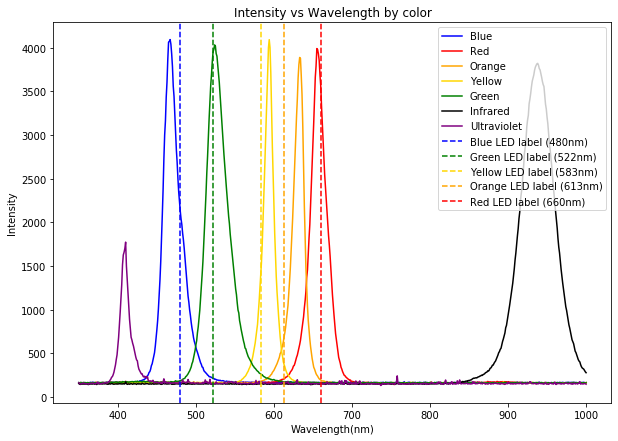

In [12]:
plt.figure(figsize=(10,7))
plt.title(r'Intensity vs Wavelength by color')
plt.xlabel(r'Wavelength(nm)')
plt.ylabel(r'Intensity')
plt.plot(df['Wavelength (nm)'],df['Blue'], 'b', label='Blue')
plt.plot(df['Wavelength (nm)'],df['Red'], 'r',label='Red')
plt.plot(df['Wavelength (nm)'],df['Orange'], color='orange',label='Orange')
plt.plot(df['Wavelength (nm)'],df['Yellow'], 'gold',label='Yellow')
plt.plot(df['Wavelength (nm)'],df['Green'], 'g',label='Green')
plt.plot(df['Wavelength (nm)'],df['Infrared'], 'black', label='Infrared')
plt.plot(df['Wavelength (nm)'],df['Ultraviolet'], 'purple',label='Ultraviolet')
axes = plt.gca()
axes.axvline(x=480,color='b',ls='--',label="Blue LED label (480nm)", ymin=0)
axes.axvline(x=522,color='g',ls='--',label="Green LED label (522nm)", ymin=0)
axes.axvline(x=583,color='gold',ls='--',label="Yellow LED label (583nm)", ymin=0)
axes.axvline(x=613,color='orange',ls='--',label="Orange LED label (613nm)", ymin=0)
axes.axvline(x=660,color='red',ls='--',label="Red LED label (660nm)", ymin=0)

plt.legend()